In [1]:
# imports
import torch
from torch.distributions import Normal,Uniform
import sys
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
path = Path.cwd().parents[1]
if str(path) not in sys.path:
    sys.path.append(str(path))

from src.kernels import NuclearKernel,GammaExponentialKernel,GaussianKernel

tensor([[0.1522, 0.1563, 0.1603,  ..., 0.0124, 0.0115, 0.0106],
        [0.1563, 0.1605, 0.1647,  ..., 0.0134, 0.0124, 0.0115],
        [0.1603, 0.1647, 0.1691,  ..., 0.0145, 0.0134, 0.0124],
        ...,
        [0.0124, 0.0134, 0.0145,  ..., 0.1691, 0.1647, 0.1603],
        [0.0115, 0.0124, 0.0134,  ..., 0.1647, 0.1605, 0.1563],
        [0.0106, 0.0115, 0.0124,  ..., 0.1603, 0.1563, 0.1522]])


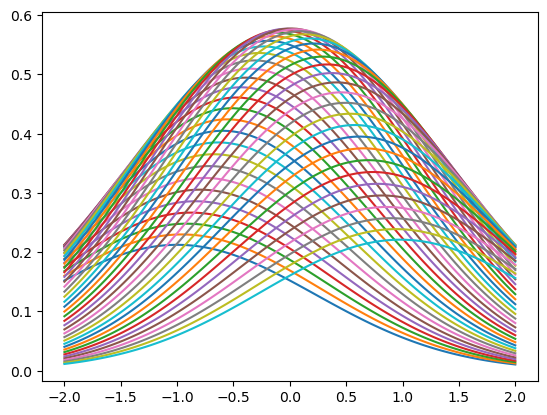

In [27]:
kernel = NuclearKernel(GaussianKernel(torch.ones(1),torch.ones(1)),
                       Normal(torch.zeros(1),torch.ones(1)*1),
                       1000)
kernel = NuclearKernel(GammaExponentialKernel(torch.ones(1),torch.ones(1), 100.0),
                       Normal(torch.zeros(1),torch.ones(1)*1),
                       1000)
X = torch.linspace(-2,2,100)[:,None]
K = kernel.get_gram_gaussian(X=X,Z=X)
print(K)

ngrid = 50
for i in range(ngrid):
    plt.plot(X,K[:,int(100/ngrid)*i])

tensor([[1.0000, 0.9998, 0.9992,  ..., 0.1466, 0.1409, 0.1353],
        [0.9998, 1.0000, 0.9998,  ..., 0.1525, 0.1466, 0.1409],
        [0.9992, 0.9998, 1.0000,  ..., 0.1586, 0.1525, 0.1466],
        ...,
        [0.1466, 0.1525, 0.1586,  ..., 1.0000, 0.9998, 0.9992],
        [0.1409, 0.1466, 0.1525,  ..., 0.9998, 1.0000, 0.9998],
        [0.1353, 0.1409, 0.1466,  ..., 0.9992, 0.9998, 1.0000]])


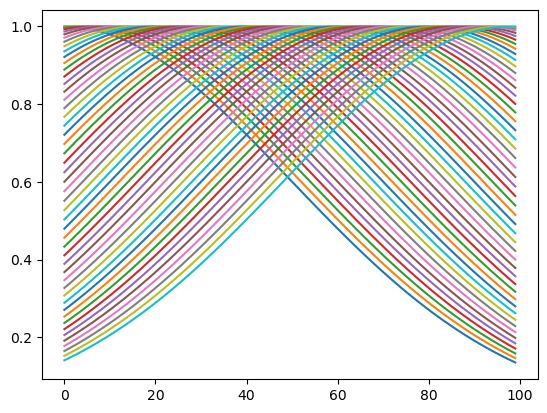

In [19]:
kernel = GammaExponentialKernel(torch.ones(1),torch.ones(1), torch.ones(1)*100)
kernel = GaussianKernel(torch.ones(1),torch.ones(1))
X = torch.linspace(-1,1,100)[:,None]
K = kernel.get_gram(X=X,Z=X)
print(K)

ngrid = 50
for i in range(ngrid):
    plt.plot(K[:,int(100/ngrid)*i])

In [36]:
n = 1000
m = 10000
eigenvals = torch.exp(-torch.linspace(1,n,n))
#eigenvals = 1/torch.linspace(1,n,n)**2
A = Normal(0,1).sample((n,n))
C = A @ A.T + torch.eye(n)

f = MultivariateNormal(torch.zeros(n),C).sample((m,)) * eigenvals
z = Normal(0,1).sample((m,n))

X = (z @ f.T).diag()

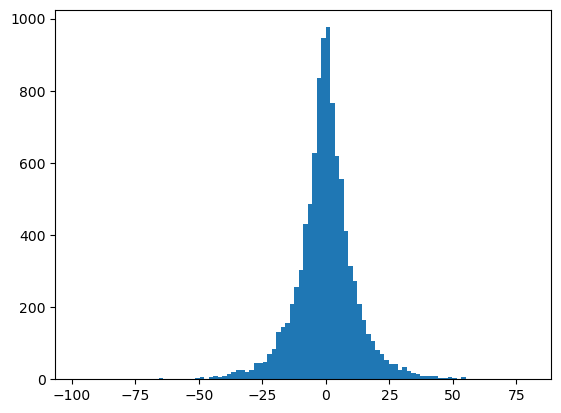

In [37]:
plt.hist(X, bins = 100);